<a href="https://colab.research.google.com/github/AAbhijithA/Plant-Happy/blob/main/Banana_LDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Random Forest ML Model for Banana Leaf Disease Detection***

*Dataset is from the given kaggle link: https://www.kaggle.com/datasets/shifatearman/bananalsd/*

*The Augmented Images were used to train the model*

*Pre-Processing Libraries*

In [ ]:
import os
from PIL import Image
import numpy as np

*Pre-Processing of Data*

In [ ]:
data_label = ['cordana','healthy','pestalotiopsis','sigatoka']
X = []
Y = []
for label in data_label:
  for image_path in os.listdir(label):
    Path = label + '/' + str(image_path)
    img = Image.open(Path)
    img = img.convert('L')
    flattened_img = np.array(img).flatten()
    X.append(flattened_img)
    Y.append(label)
print(X)
print(Y)

[array([68, 69, 69, ..., 59, 58, 57], dtype=uint8), array([174, 175, 175, ...,  85,  93, 100], dtype=uint8), array([122, 122, 123, ..., 108, 109, 112], dtype=uint8), array([159, 160, 160, ...,  74,  73,  73], dtype=uint8), array([152, 152, 151, ..., 188, 188, 188], dtype=uint8), array([143, 144, 146, ..., 101, 102, 104], dtype=uint8), array([140, 140, 140, ..., 129, 146, 168], dtype=uint8), array([173, 175, 177, ..., 149, 150, 150], dtype=uint8), array([175, 169, 166, ...,  78,  82,  89], dtype=uint8), array([69, 67, 64, ..., 76, 74, 73], dtype=uint8), array([152, 152, 152, ..., 160, 164, 168], dtype=uint8), array([116, 115, 108, ..., 149, 142, 143], dtype=uint8), array([185, 190, 193, ..., 115, 113, 111], dtype=uint8), array([155, 155, 155, ..., 177, 179, 181], dtype=uint8), array([161, 160, 160, ..., 158, 161, 163], dtype=uint8), array([135, 134, 132, ..., 116, 127, 140], dtype=uint8), array([162, 157, 160, ..., 137, 131, 129], dtype=uint8), array([157, 155, 152, ..., 163, 164, 164],

*Training the Random Forest Model and finding the best Accuracy Score for the parameters*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
r_state = 39
test_X = []
test_Y = []

for DTrees in [10,20,30,40,50,60,70,80,90,100]:
  RF_model = RandomForestClassifier(n_estimators=DTrees, random_state=r_state)
  RF_model.fit(X_train,Y_train)
  Y_pred = RF_model.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  test_X.append(DTrees)
  test_Y.append(accuracy)


In [ ]:
for DTrees in [110,120,130,140,150,160,170,180,190,200]:
  RF_model = RandomForestClassifier(n_estimators=DTrees, random_state=r_state)
  RF_model.fit(X_train,Y_train)
  Y_pred = RF_model.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  test_X.append(DTrees)
  test_Y.append(accuracy)

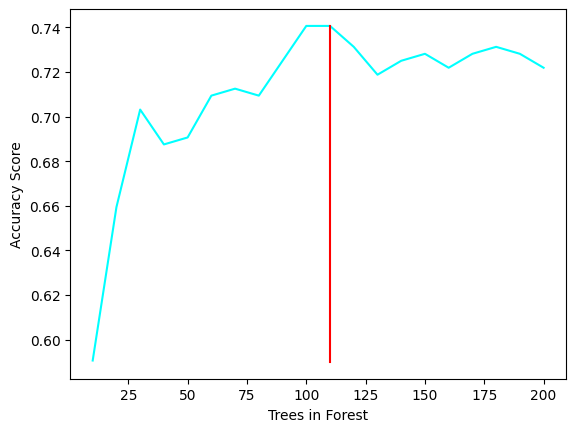

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(test_X,test_Y,linestyle='solid',color='cyan')
plt.plot([110,110],[0.59,test_Y[10]],linestyle='solid',color='red')
plt.xlabel('Trees in Forest')
plt.ylabel('Accuracy Score')
plt.show()

*Saving the model for later use*

In [ ]:
RF_model = RandomForestClassifier(n_estimators=110, random_state=r_state)
RF_model.fit(X_train,Y_train)
Y_pred = RF_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(accuracy)
print(report)
print(conf_matrix)

0.740625
                precision    recall  f1-score   support

       cordana       0.81      0.79      0.80        89
       healthy       0.79      0.88      0.83        82
pestalotiopsis       0.75      0.57      0.65        79
      sigatoka       0.60      0.71      0.65        70

      accuracy                           0.74       320
     macro avg       0.74      0.74      0.73       320
  weighted avg       0.75      0.74      0.74       320

[[70  0  1 18]
 [ 1 72  5  4]
 [ 7 16 45 11]
 [ 8  3  9 50]]


*Final Test*

In [ ]:
import pickle
with open('RF_Model_Trained.pkl', 'wb') as f:
    pickle.dump(RF_model, f)

In [ ]:
loaded_model = None
with open('RF_Model_Trained.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

array(['healthy', 'cordana', 'cordana', 'sigatoka', 'sigatoka',
       'sigatoka', 'sigatoka', 'cordana', 'healthy', 'healthy', 'healthy',
       'pestalotiopsis', 'pestalotiopsis', 'sigatoka', 'healthy',
       'sigatoka', 'cordana', 'sigatoka', 'cordana', 'healthy',
       'sigatoka', 'healthy', 'cordana', 'cordana', 'cordana',
       'pestalotiopsis', 'pestalotiopsis', 'sigatoka', 'cordana',
       'pestalotiopsis', 'sigatoka', 'sigatoka', 'pestalotiopsis',
       'healthy', 'healthy', 'healthy', 'sigatoka', 'healthy', 'cordana',
       'cordana', 'pestalotiopsis', 'healthy', 'sigatoka', 'cordana',
       'sigatoka', 'cordana', 'healthy', 'cordana', 'healthy', 'sigatoka',
       'pestalotiopsis', 'healthy', 'healthy', 'cordana', 'cordana',
       'sigatoka', 'cordana', 'pestalotiopsis', 'healthy', 'healthy',
       'sigatoka', 'cordana', 'cordana', 'pestalotiopsis', 'healthy',
       'cordana', 'healthy', 'pestalotiopsis', 'healthy', 'cordana',
       'sigatoka', 'healthy', 'sigatok

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
